<a href="https://colab.research.google.com/github/LaraNegri/EntregasPDI/blob/main/TP3/Practico3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctico 3

Creado por: Lara Negri

## Descripción del práctico

El trabajo consiste en seleccionar dos imágenes y con estas poder realizar las siguientes operaciones:

*   Espacio RGB
> * Sumas y restas: Clampeada y Promediada

*   Espacio YIQ
> * Sumas y restas: Clampeada, Promediada, If-Lighter, If-Darker

Los resultados deben guardarse cómo una nueva imagen. 



## Librerias requeridas

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import imageio as io

## Funciones a utlizar

In [ ]:
# Función para leer una imagen y tenerla como Array numpy sin limitación uint8
def get_image(rute):
  im = io.imread(rute)
  im = im.astype(np.int)
  return im
  
  # Obtener el canal R normalizado de una imagen
def get_R(im):
  R = im[:, :, 0]
  return R

  # Obtener el canal G normalizado de una imagen
def get_G(im):
  G = im[:, :, 1]
  return G

  # Obtener el canal B normalizado de una imagen
def get_B(im):
  B = im[:, :, 2]
  return B

def rgb_to_image(r,g,b):
  Shape = r.shape
  im_out = np.zeros((Shape[0], Shape[1], 3))
  im_out[:,:,0] = RC
  im_out[:,:,1] = GC
  im_out[:,:,2] = BC
  return im_out.astype(np.uint8)

def plot_C(r,g,b):
  C = rgb_to_image(RC,GC,BC)
  plt.imshow(C)
  plt.show()

## Seleccionamos las imágenes A y B

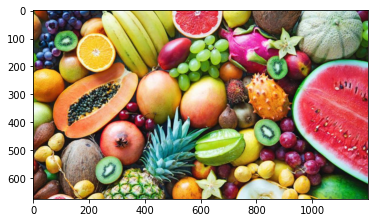

In [ ]:
#@title Selecccione la imagen A { run: "auto" }

Fruits = 'https://www.lavanguardia.com/files/og_thumbnail/uploads/2019/06/04/5e99794702a16.jpeg'
Dogs ='https://ichef.bbci.co.uk/news/976/cpsprodpb/14545/production/_120496238_gettyimages-1253904293.jpg'
Whale = 'https://www.thoughtco.com/thmb/S1SaSlZvPsW4V1Y5jf1-EOgRIDs=/1920x1080/smart/filters:no_upscale()/killer-whales-591130_1920-a40d29197e584bccb50fdae288bf6eb5.jpg'
Imagen = 'Fruits' #@param ["Fruits", "Dogs", "Whale"]

if Imagen == 'Fruits':
  A = get_image(Fruits)
  plt.imshow(A) 
  plt.show()
elif Imagen == 'Dogs':
  A = get_image(Dogs)
  plt.imshow(A) 
  plt.show()
elif Imagen == 'Whale':
  A = get_image(Whale)
  plt.imshow(A) 
  plt.show()

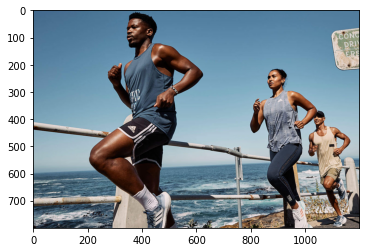

In [ ]:
#@title Selecccione la imagen B { run: "auto" }

Mountain = 'https://d25rq8gxcq0p71.cloudfront.net/dictionary-images/324/06017475-672c-4a10-9d60-add992ed293c.jpg'
Running ='https://www.runtastic.com/blog/wp-content/uploads/2019/03/blog_thumbnail_run-for-the-oceans_proper-running-form_1200x800.jpg'
Trees = 'https://www.sciencenewsforstudents.org/wp-content/uploads/2020/04/1030_LL_trees-1028x579.png'
Imagen = 'Running' #@param ["Mountain", "Running", "Trees"]

if Imagen == 'Mountain':
  B = get_image(Mountain)
  plt.imshow(B) 
  plt.show()
elif Imagen == 'Running':
  B = get_image(Running)
  plt.imshow(B) 
  plt.show()
elif Imagen == 'Trees':
  B = get_image(Trees)
  plt.imshow(B) 
  plt.show()

### Croppeamos las imágenes para que tengan el mismo tamaño

Para realizar las operaciones entre imágenes vamos a ver qué imagen es más chica, y vamos a trabajar en ese entorno.

In [ ]:
widthA, heightA, zA = A.shape
widthB, heightB, zA = B.shape

print (A.shape, B.shape)

if widthA < widthB:
    widthmin = widthA
else:
    widthmin = widthB

if heightA < heightB:
    heightmin = heightA
else:
    heightmin = heightB

print (widthmin, heightmin)

(675, 1200, 3) (800, 1200, 3)
675 1200


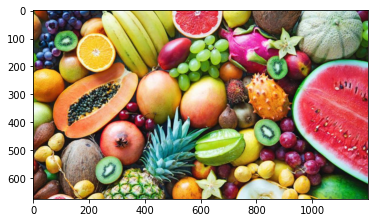

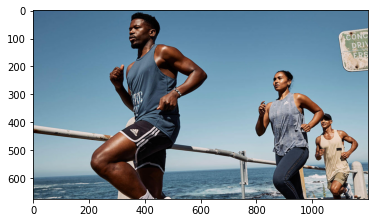

In [ ]:
#Recorto las imágenes para que queden del mismo tamaño (y muestro la imagen recortada obtenida)

Acropped = A[0:widthmin, 0:heightmin]

plt.imshow(Acropped) 
plt.show()

Bcropped = B[0:widthmin, 0:heightmin]

plt.imshow(Bcropped) 
plt.show()

## Espacio RGB

#### Suma Clampeada

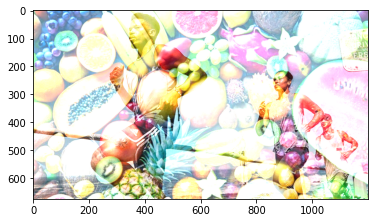

In [ ]:
#Generamos los canales RGB de la imagen final C

RC = get_R(Acropped) + get_R(Bcropped)
GC = get_G(Acropped) + get_G(Bcropped)
BC = get_B(Acropped) + get_B(Bcropped)

RC = np.clip(RC, 0, 255)
GC = np.clip(GC, 0, 255)
BC = np.clip(BC, 0, 255)

#Ploteamos la imagen final
RGB_suma_clampeada = rgb_to_image(RC,GC,BC)
plot_C(RC,GC,BC)

### Resta clampeada

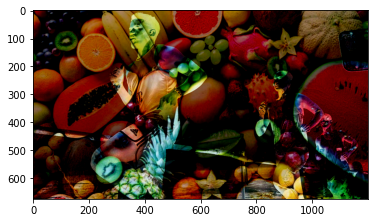

In [ ]:
#Generamos los canales RGB de la imagen final C

RC = get_R(Acropped) - get_R(Bcropped)
GC = get_G(Acropped) - get_G(Bcropped)
BC = get_B(Acropped) - get_B(Bcropped)

RC = np.clip(RC, 0, 255)
GC = np.clip(GC, 0, 255)
BC = np.clip(BC, 0, 255)

#Ploteamos la imagen final
RGB_resta_clampeada = rgb_to_image(RC,GC,BC)
plot_C(RC,GC,BC)

### Suma promediada

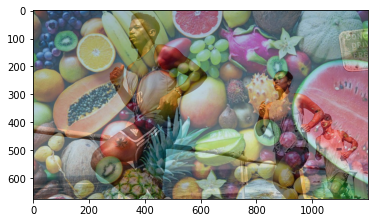

In [ ]:
#Generamos los canales RGB de la imagen final C

RC = (get_R(Acropped) + get_R(Bcropped))/2
GC = (get_G(Acropped) + get_G(Bcropped))/2
BC = (get_B(Acropped) + get_B(Bcropped))/2

RC = np.clip(RC, 0, 255)
GC = np.clip(GC, 0, 255)
BC = np.clip(BC, 0, 255)

#Ploteamos la imagen final
RGB_suma_promediada = rgb_to_image(RC,GC,BC)
plot_C(RC,GC,BC)

### Resta promediada

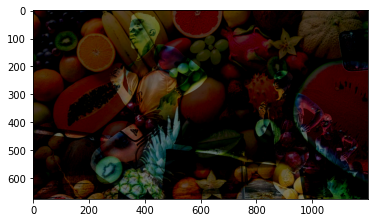

In [ ]:
#Generamos los canales RGB de la imagen final C

RC = (get_R(Acropped) - get_R(Bcropped))/2
GC = (get_G(Acropped) - get_G(Bcropped))/2
BC = (get_B(Acropped) - get_B(Bcropped))/2

RC = np.clip(RC, 0, 255)
GC = np.clip(GC, 0, 255)
BC = np.clip(BC, 0, 255)

#Ploteamos la imagen final
RGB_resta_promediada = rgb_to_image(RC,GC,BC)
plot_C(RC,GC,BC)

## Espacio YIQ

In [ ]:
#Primero necesito los valores de R, G, B de las imágenes

RA = get_R(Acropped)/255
GA = get_G(Acropped)/255
BA = get_B(Acropped)/255

RB = get_R(Bcropped)/255
GB = get_G(Bcropped)/255
BB = get_B(Bcropped)/255

#Ahora obtengo los valores de YIQ de cada imagen
YA = 0.299*RA + 0.587*GA + 0.114*BA
IA = 0.595716*RA + -0.274453*GA + -0.321263*BA
QA = 0.211456*RA + -0.522591*GA + 0.311135*BA

YB = 0.299*RB + 0.587*GB + 0.114*BB
IB = 0.595716*RB + -0.274453*GB + -0.321263*BB
QB = 0.211456*RB + -0.522591*GB + 0.311135*BB


### Suma Clampeada

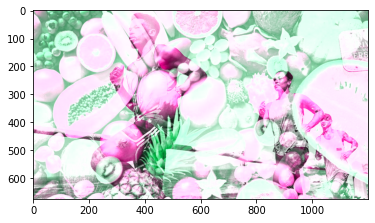

In [ ]:
#Generamos los canales YIQ de la imagen final C

YC = abs(YA + YB)
IC = (YA*IA + YB*IB)/YC
QC = (YA*QA + YB*QB)/YC

YC = np.clip(YC, 0, 1)
QC = np.clip(IC, -0.5926, 0.5926)
IC = np.clip(QC, -0.5226, 0.5226)

#Ahora vuelvo al espacio RGB para poder graficar
RC = (YC + 0.9663*IC + 0.6210*QC)*255
GC = (YC -0.2721*IC -0.6474*QC)*255
BC = (YC -1.1070*IC + 1.7046*QC)*255

RC = np.clip(RC, 0, 255)
GC = np.clip(GC, 0, 255)
BC = np.clip(BC, 0, 255)

#Ploteamos la imagen final
YIQ_suma_clampeada = rgb_to_image(RC,GC,BC)
plot_C(RC,GC,BC)

### Resta Clampeada

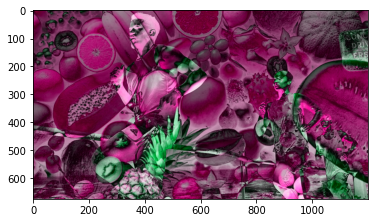

In [ ]:
#Generamos los canales YIQ de la imagen final C

YC = abs(YA - YB)
IC = (YA*IA - YB*IB)/(YA + YB)
QC = (YA*QA - YB*QB)/(YA + YB)

YC = np.clip(YC, 0, 1)
QC = np.clip(IC, -0.5926, 0.5926)
IC = np.clip(QC, -0.5226, 0.5226)

#Ahora vuelvo al espacio RGB para poder graficar
RC = (YC + 0.9663*IC + 0.6210*QC)*255
GC = (YC -0.2721*IC -0.6474*QC)*255
BC = (YC -1.1070*IC + 1.7046*QC)*255

RC = np.clip(RC, 0, 255)
GC = np.clip(GC, 0, 255)
BC = np.clip(BC, 0, 255)

#Ploteamos la imagen final
YIQ_resta_clampeada = rgb_to_image(RC,GC,BC)
plot_C(RC,GC,BC)

### Suma promediada

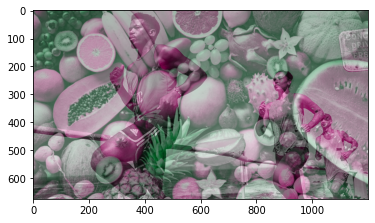

In [ ]:
#Generamos los canales YIQ de la imagen final C

YC = abs(YA + YB)/2
IC = (YA*IA + YB*IB)/(2*(YA + YB))
QC = (YA*QA + YB*QB)/(2*(YA + YB))

YC = np.clip(YC, 0, 1)
QC = np.clip(IC, -0.5926, 0.5926)
IC = np.clip(QC, -0.5226, 0.5226)

#Ahora vuelvo al espacio RGB para poder graficar
RC = (YC + 0.9663*IC + 0.6210*QC)*255
GC = (YC -0.2721*IC -0.6474*QC)*255
BC = (YC -1.1070*IC + 1.7046*QC)*255

RC = np.clip(RC, 0, 255)
GC = np.clip(GC, 0, 255)
BC = np.clip(BC, 0, 255)

#Ploteamos la imagen final
YIQ_suma_promediada = rgb_to_image(RC,GC,BC)
plot_C(RC,GC,BC)

### Resta Promediada

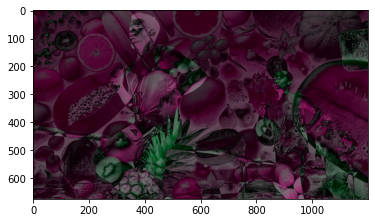

In [ ]:
#Generamos los canales YIQ de la imagen final C

YC = abs(YA - YB)/2
IC = (YA*IA - YB*IB)/(2*(YA + YB))
QC = (YA*QA - YB*QB)/(2*(YA + YB))

YC = np.clip(YC, 0, 1)
QC = np.clip(IC, -0.5926, 0.5926)
IC = np.clip(QC, -0.5226, 0.5226)

#Ahora vuelvo al espacio RGB para poder graficar
RC = (YC + 0.9663*IC + 0.6210*QC)*255
GC = (YC -0.2721*IC -0.6474*QC)*255
BC = (YC -1.1070*IC + 1.7046*QC)*255

RC = np.clip(RC, 0, 255)
GC = np.clip(GC, 0, 255)
BC = np.clip(BC, 0, 255)

#Ploteamos la imagen final
YIQ_resta_promediada = rgb_to_image(RC,GC,BC)
plot_C(RC,GC,BC)

### If Lighter

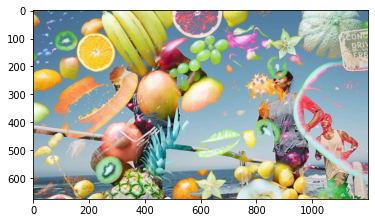

In [ ]:
#Generamos los canales YIQ de la imagen final C

for i in range(widthmin):
  for j in range(heightmin):
    if YA[i,j] > YB[i,j]:
      YC[i,j] = YA[i,j]
      IC[i,j] = IA[i,j]
      QC[i,j] = QA[i,j]
    else:
      YC[i,j] = YB[i,j]
      IC[i,j] = IB[i,j]
      QC[i,j] = QB[i,j]

#Ahora vuelvo al espacio RGB para poder graficar
RC = (YC + 0.9663*IC + 0.6210*QC)*255
GC = (YC -0.2721*IC -0.6474*QC)*255
BC = (YC -1.1070*IC + 1.7046*QC)*255

RC = np.clip(RC, 0, 255)
GC = np.clip(GC, 0, 255)
BC = np.clip(BC, 0, 255)

#Ploteamos la imagen final
YIQ_IfLighter = rgb_to_image(RC,GC,BC)
plot_C(RC,GC,BC)

### If Darker

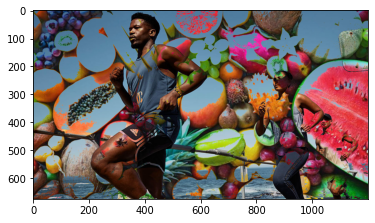

In [ ]:
#Generamos los canales YIQ de la imagen final C

for i in range(widthmin):
  for j in range(heightmin):
    if YA[i,j] < YB[i,j]:
      YC[i,j] = YA[i,j]
      IC[i,j] = IA[i,j]
      QC[i,j] = QA[i,j]
    else:
      YC[i,j] = YB[i,j]
      IC[i,j] = IB[i,j]
      QC[i,j] = QB[i,j]

#Ahora vuelvo al espacio RGB para poder graficar
RC = (YC + 0.9663*IC + 0.6210*QC)*255
GC = (YC -0.2721*IC -0.6474*QC)*255
BC = (YC -1.1070*IC + 1.7046*QC)*255

RC = np.clip(RC, 0, 255)
GC = np.clip(GC, 0, 255)
BC = np.clip(BC, 0, 255)

#Ploteamos la imagen final
YIQ_IfDarker = rgb_to_image(RC,GC,BC)
plot_C(RC,GC,BC)

## Elección de proceso a realizar

Seleccione el proceso que quiere que se realice con las imágenes A y B seleccionadas al principio.

Usted seleccionó realizar YIQ_IfLigher


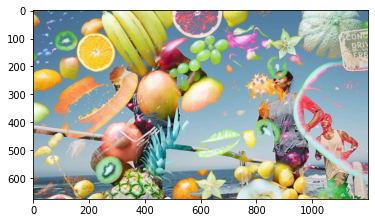

In [ ]:
#@title { run: "auto" }
Ejecutar = "YIQ_IfLigher" #@param ["RGB_suma_clampeada", "RGB_resta_clampeada", "RGB_suma_promediada", "RGB_resta_promediada","YIQ_suma_clampeada", "YIQ_resta_clampeada", "YIQ_suma_promediada", "YIQ_resta_promediada", "YIQ_IfLigher", "YIQ_IfDarker" ]
print('Usted seleccionó realizar', Ejecutar)

if Ejecutar == 'RGB_suma_clampeada':
  plt.imshow(RGB_suma_clampeada)
elif Ejecutar == 'RGB_resta_clampeada':
  plt.imshow(RGB_resta_clampeada)
elif Ejecutar == 'RGB_suma_promediada':
  plt.imshow(RGB_suma_promediada)
elif Ejecutar == 'RGB_resta_promediada':
  plt.imshow(RGB_resta_promediada)
elif Ejecutar == 'YIQ_suma_clampeada':
  plt.imshow(YIQ_suma_clampeada)
elif Ejecutar == 'YIQ_resta_clampeada':
  plt.imshow(YIQ_resta_clampeada)
elif Ejecutar == 'YIQ_suma_promediada':
  plt.imshow(YIQ_suma_promediada)
elif Ejecutar == 'YIQ_resta_promediada':
  plt.imshow(YIQ_resta_promediada)
elif Ejecutar == 'YIQ_IfLigher':
  plt.imshow(YIQ_IfLighter)
elif Ejecutar == 'YIQ_IfDarker':
  plt.imshow(YIQ_IfDarker)

## Conclusiones

En cuanto al espacio RGB, podemos ver que ambos cálculos de suma devuelven imágenes más claras que los cálculos de restas. Esto puede deberse a que al restar los valores de RGB de las imágenes, tomando la imagen A por defecto como el minuendo, y la imagen B como sustraendo, probablemente obtengamo valores negativos para los distintos canales en los píxeles en los que B es más oscura que A. Al vernos obligados a "clippear" estos valores, comienzan a aparecer muchos valores de 0, es decir, píxeles negros.\
Sin embargo, si la resta se realizara al revés, es decir B-A, los valores que antes eran negativos, ahora pasan a ser positivos, y generarían pixeles más claros (al menos mayores a 0), pero nuevamente tendremos píxeles negativos, solo que en otro punto de la imagen. \
En el caso de la suma, al ser esta una propiedad conmutativa, no se generan diferencias al variar el orden de los productos, y además, por definición es imposible obtener valores negativos que tengan que clippearse a cero, por lo que, hay muchas menos posibilidades de obtener imágenes oscuras. Sumado a esto, la probabilidad de que sumando dos números (los valores de R, G o B) de cada imagen, ambos sean cero tal que el valor de R, G o B de la imagen C también sea cero, es muy baja.

En cuanto al espacio YIQ, sucede algo muy similar. Además, podemos ver que en el caso de las sumas y restas, todas las imágenes con las que se trabajó, muestran colores violetas y verdes muy marcados en las restas, y las mismas tonalidades aparecen en las sumas de forma más clara.\
En cuanto a los procesos de If Lighter e If Darker, los resultados son muy llamativos. Devuelven distintos sectores de cada imagen, pero podemos ver que en general, se pueden ver regiones enteras de cada imagen, permitiendonos distinguir las figuras iniciales que aparecían en las imágenes A y B iniciales.
Es decir, podemos ver que en las imágenes iniciales, hay regiones enteras, es decir, conjuntos de píxeles cercanos en el espacio, que presentan valores de luminancia similares (ya sean altos o bajos). Esto puede apreciarse muy facilmente si se selecciona la imagen 'Fruits' como imagen A.

